In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing

In [27]:
df = pd.read_csv("boston_housing.csv")

In [28]:
df

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0
...,...,...,...,...
484,6.593,9.67,21.0,470400.0
485,6.120,9.08,21.0,432600.0
486,6.976,5.64,21.0,501900.0
487,6.794,6.48,21.0,462000.0


In [29]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
RM,6.575,6.421,7.185,6.998,7.147,6.43,6.012,6.172,5.631,6.004
LSTAT,4.980,9.140,4.030,2.940,5.330,5.21,12.430,19.150,29.930,17.100
PTRATIO,15.300,17.800,17.800,18.700,18.700,18.70,15.200,15.200,15.200,15.200
MEDV,504000.000,453600.000,728700.000,701400.000,760200.000,602700.00,480900.000,569100.000,346500.000,396900.000


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RM       489 non-null    float64
 1   LSTAT    489 non-null    float64
 2   PTRATIO  489 non-null    float64
 3   MEDV     489 non-null    float64
dtypes: float64(4)
memory usage: 15.4 KB


In [31]:
df.describe()

,RM,LSTAT,PTRATIO,MEDV
count,489.000000,489.000000,489.000000,4.890000e+02
mean,6.240288,12.939632,18.516564,4.543429e+05
std,0.643650,7.081990,2.111268,1.653403e+05
min,3.561000,1.980000,12.600000,1.050000e+05
25%,5.880000,7.370000,17.400000,3.507000e+05
50%,6.185000,11.690000,19.100000,4.389000e+05
75%,6.575000,17.120000,20.200000,5.187000e+05
max,8.398000,37.970000,22.000000,1.024800e+06


In [32]:
df.shape

(489, 4)

<AxesSubplot:xlabel='LSTAT', ylabel='PTRATIO'>

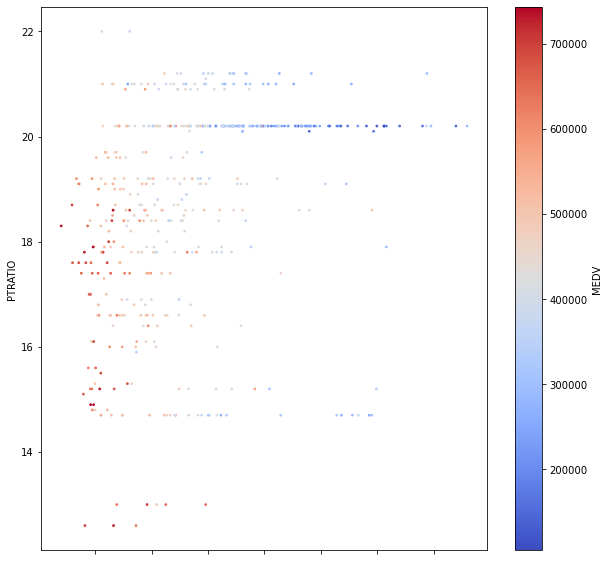

In [33]:
df[df.MEDV<750000].plot(kind="scatter",x = "LSTAT",y="PTRATIO",c="MEDV",cmap="coolwarm",s=3,figsize=(10,10))

In [34]:
scaler = preprocessing.StandardScaler()
df[['RM','LSTAT','PTRATIO','MEDV']] = scaler.fit_transform(df[['RM','LSTAT','PTRATIO','MEDV']])

In [35]:
df1 = df[df.MEDV<750000]
x = df1.drop(['MEDV'],axis=1)
y = df1.MEDV
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [37]:
lm = LinearRegression()
lm.fit(x_train,y_train)
y_pred = lm.predict(x_test)

Text(0, 0.5, 'Predicted Prices')

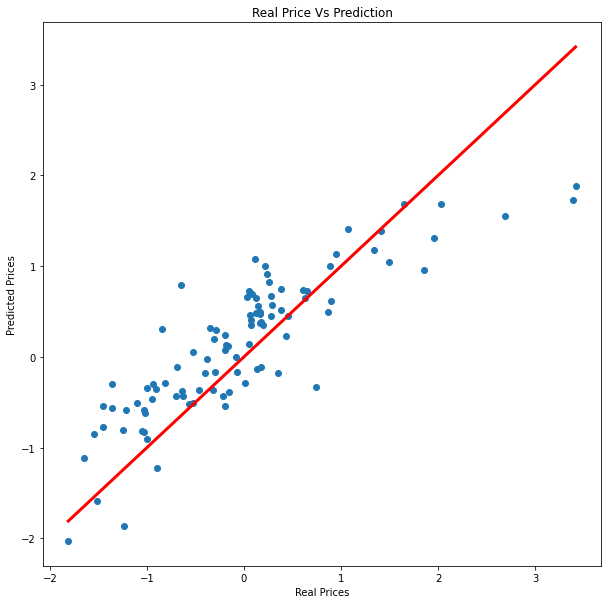

In [38]:
plt.figure(figsize=(10,10))
plt.scatter(y_test,y_pred)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],color="red",linewidth=3)
plt.title("Real Price Vs Prediction")
plt.xlabel("Real Prices")
plt.ylabel("Predicted Prices")